# Capstone 1:  Exercise 7.2.1:  v3 

# Data story

This notebook is an exploration of the Ames housing data, after I've first cleaned it.  

In this notebook, I'm going to focus on the dependent variables--SalePrice.  

I'm thinking about the following questions:

* What's the distribution of SalePrice?
* Are there outliers in SalePrice?
* What's the count of sales by year?
* Is there seasonality to sales?
* What's the count of sales by month?
* How are the prices of SalePrice changing by year?

## History

* v1:    First draft
* v2.1:  Remove the statistical analysis
* v2.2:  Added a summary.  Cleaned up a graph
* v2.3:  Took the log of sales price.  No longer no on hypo tests
* v3:    Cleaned up graphs for final reports

## Set up

In [1]:
# Import key libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set default seaborn style
sns.set()

# Set a default linewidth of 1
LW = 1

## Collect the cleaned data

In [3]:
# Unpickle the dataframe 
df = pd.read_pickle('data/df_cln_v1.pickle')

## Question 1:  What is the distribution of SalesPrice?

In [4]:
# Get summary stats
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Takeaway:

* Mean sales price is about \\$180k
* Median sales price is about \$160k
* Mean > median is hint at skew.
* IQR is about \\$85k from \\$130 to \\$215
* Min is about \\$35k and max is \\$750

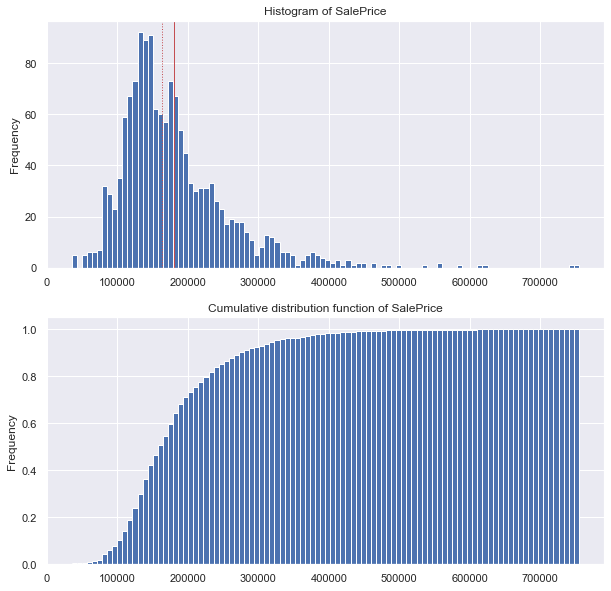

In [5]:
# Look at the distribution - historgram and CDF
_ = fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,10))
_ = df['SalePrice'].plot(ax=axes[0], kind='hist', bins=100)
_ = axes[0].set_title('Histogram of SalePrice')
_ = df['SalePrice'].plot(ax=axes[1], kind='hist', cumulative=True, density=True, bins=100)
_ = axes[0].axvline(df['SalePrice'].mean(), color='r', linestyle='solid', linewidth=LW)
_ = axes[0].axvline(df['SalePrice'].median(), color='r', linestyle='dotted', linewidth=LW)
_ = axes[1].set_title('Cumulative distribution function of SalePrice')
_ = plt.show()

In [6]:
df['SalePrice'].head()

Id
1    208500
2    181500
3    223500
4    140000
5    250000
Name: SalePrice, dtype: int64

In [7]:
# ax1 = sns.subplots(nrows=2, ncols=1, figsize=(10,10))

### Look at a log tranformed data set

In [8]:
# Make a table with logs of SalePrice 

df_log = pd.DataFrame(df['SalePrice'].copy())
df_log['SalesPrice_log'] = np.log(df['SalePrice'])
df_log['SalesPrice_log10'] = np.log10(df['SalePrice'])
df_log.head()

,SalePrice,SalesPrice_log,SalesPrice_log10
Id,,,
1,208500,12.247694,5.319106
2,181500,12.109011,5.258877
3,223500,12.317167,5.349278
4,140000,11.849398,5.146128
5,250000,12.429216,5.397940


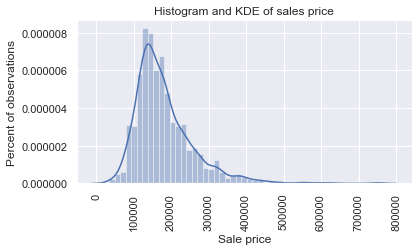

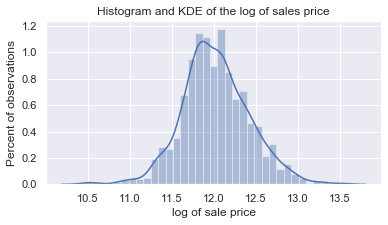

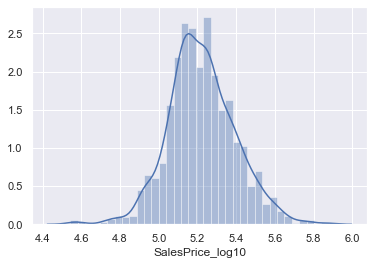

In [9]:
# Graph all the distributins as KDE

ax1 = plt.figure(figsize=(6, 3))
ax1 = sns.distplot(df_log['SalePrice'])
ax1 = plt.xlabel("Sale price")
ax1 = plt.xticks(rotation=90)
ax1 = plt.ylabel('Percent of observations')
ax1 = plt.title('Histogram and KDE of sales price')
plt.show()

ax2 = plt.figure(figsize=(6, 3))
ax2 = sns.distplot(df_log['SalesPrice_log'])
ax2 = plt.xlabel("log of sale price")
ax2 = plt.ylabel('Percent of observations')
ax2 = plt.title('Histogram and KDE of the log of sales price')
plt.show()

ax3 = sns.distplot(df_log['SalesPrice_log10'])
plt.show()

Takeaways:

* Histogram isn't normal
* Right skew (aka, bulk on right).  Aka, Positive skew (aka, long tail of positive)
* Outliers on the upper values
* Two peaks--one around \\$150k, another around \\$200K
* Maybe the values tend to 'clump' around specific sales prices
* The log tranformed data set is more normal

## Question 2:  Are there outliers in SalePrice?

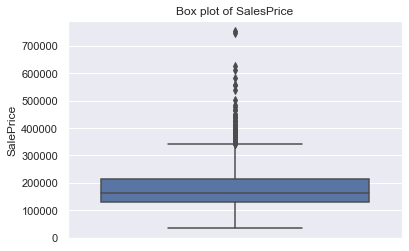

In [10]:
# Look at a boxplot
ax = sns.boxplot(y=df['SalePrice'], data=df)
ax = plt.title("Box plot of SalesPrice")

In [11]:
# Look at a boxplot - Try 1 - without seaborn
# _ = plt.boxplot(df['SalePrice'])
# _ = plt.title("Box plot of SalesPrice")
# _ = plt.show()

In [12]:
# List outliers - use basic definition of 3xd standard deviations from mean
sales_price_std = df.SalePrice.std()
sales_price_m = df.SalePrice.mean()
multiple = 3
outlier_lo = sales_price_m - (multiple * sales_price_std)
outlier_hi = sales_price_m + (multiple * sales_price_std)
# outlier_lo = 35000
# outlier_hi = 750000
# print(outlier_lo, outlier_hi)
print('There are {} outlier(s) at or below {}'.format(df.SalePrice[df.SalePrice <= outlier_lo].count(), outlier_lo))
print()
print('There are {} outlier(s) at or above {}'.format(df.SalePrice[df.SalePrice >= outlier_hi].count(), outlier_hi))
print()
print('Here is the list:')
print(df.SalePrice[(df.SalePrice <= outlier_lo) | (df.SalePrice >= outlier_hi)])

# Save the values for later graph
outlier_lo_3std = outlier_lo
outlier_hi_3std = outlier_hi

There are 0 outlier(s) at or below -57406.31275824897

There are 22 outlier(s) at or above 419248.70453907084

Here is the list:
Id
59      438780
179     501837
186     475000
350     437154
390     426000
441     555000
474     440000
497     430000
528     446261
592     451950
665     423000
692     755000
770     538000
799     485000
804     582933
899     611657
1047    556581
1143    424870
1170    625000
1183    745000
1244    465000
1374    466500
Name: SalePrice, dtype: int64


In [13]:
# Look at outliers - use Tukey's outlier definition of 1.5 IQR from quartile1 and quartile3
sales_price_25ile = df.SalePrice.quantile(.25)
sales_price_75ile = df.SalePrice.quantile(.75)
multiple = 1.5
outlier_lo = sales_price_25ile - (multiple * sales_price_25ile)
outlier_hi = sales_price_75ile + (multiple * sales_price_75ile)
print('There are {} outlier(s) at or below {}'.format(df.SalePrice[df.SalePrice <= outlier_lo].count(), outlier_lo))
print()
print('There are {} outlier(s) at or above {}'.format(df.SalePrice[df.SalePrice >= outlier_hi].count(), outlier_hi))
print()
print('Here is the list:')
print(pd.DataFrame(df.SalePrice[(df.SalePrice <= outlier_lo) | (df.SalePrice >= outlier_hi)]))

# Save the values for later graph
outlier_lo_1halfIRQ = outlier_lo
outlier_hi_1halfIRQ = outlier_hi

There are 0 outlier(s) at or below -64987.5

There are 8 outlier(s) at or above 535000.0

Here is the list:
      SalePrice
Id             
441      555000
692      755000
770      538000
804      582933
899      611657
1047     556581
1170     625000
1183     745000


In [14]:
# Look at outliers - use Tukey's 'far out' definition of 3 times the IQR
sales_price_25ile = df.SalePrice.quantile(.25)
sales_price_75ile = df.SalePrice.quantile(.75)
multiple = 3
outlier_lo = sales_price_25ile - (multiple * sales_price_25ile)
outlier_hi = sales_price_75ile + (multiple * sales_price_75ile)
print('There are {} outlier(s) at or below {}'.format(df.SalePrice[df.SalePrice <= outlier_lo].count(), outlier_lo))
print()
print('There are {} outlier(s) at or above {}'.format(df.SalePrice[df.SalePrice >= outlier_hi].count(), outlier_hi))


# Save the values for later graph
outlier_lo_3IRQ = outlier_lo
outlier_hi_3IRQ = outlier_hi

There are 0 outlier(s) at or below -259950.0

There are 0 outlier(s) at or above 856000.0


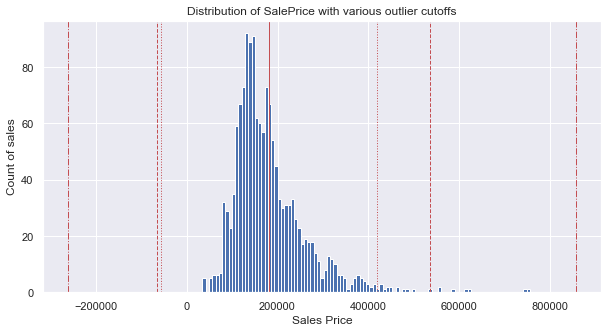

In [15]:
# Look at the distribution - as historgram and as CDF

_ = plt.figure(figsize=(10,5))
_ = plt.hist(df['SalePrice'], bins=100)
df['SalePrice']
_ = plt.xlabel('Sales Price')
_ = plt.ylabel('Count of sales')
_ = plt.title('Distribution of SalePrice with various outlier cutoffs')

# _ = plt.axvline(mean, color='r')
LW = 1
_ = plt.axvline(df['SalePrice'].mean(), color='r', linestyle='solid', linewidth=LW)
_ = plt.axvline(outlier_lo_3std, color='r', linestyle='dotted', linewidth=LW)
_ = plt.axvline(outlier_hi_3std, color='r', linestyle='dotted', linewidth=LW)
_ = plt.axvline(outlier_lo_1halfIRQ, color='r', linestyle='dashed', linewidth=LW)
_ = plt.axvline(outlier_hi_1halfIRQ, color='r', linestyle='dashed', linewidth=LW)
_ = plt.axvline(outlier_lo_3IRQ, color='r', linestyle='dashdot', linewidth=LW)
_ = plt.axvline(outlier_hi_3IRQ, color='r', linestyle='dashdot', linewidth=LW)

## Question 3:  What's the timing of sales?

That is, what's the count of sales by year?

In [16]:
# What's the range?
print('The first sales was on {}'.format(min(df.YrMoSold)))
print('The last sale was on {}'.format(max(df.YrMoSold)))

The first sales was on 2006-01
The last sale was on 2010-07


In [17]:
# Make table of count of sales by year
count_by_year = df.YrSold.value_counts().sort_index()
count_by_year = pd.DataFrame(count_by_year)
count_by_year.index.set_names = 'year'
count_by_year.columns = ['sales_count']
count_by_year

,sales_count
2006,314
2007,329
2008,304
2009,338
2010,175


In [18]:
# Get basic stat
count_by_year.describe()

,sales_count
count,5.000000
mean,292.000000
std,66.712068
min,175.000000
25%,304.000000
50%,314.000000
75%,329.000000
max,338.000000


Takeaway:
    
* Most years are about 315 (aka, median)
* Not that much deviation between the years.  
* But for 2010, which is about 1/2 that amount

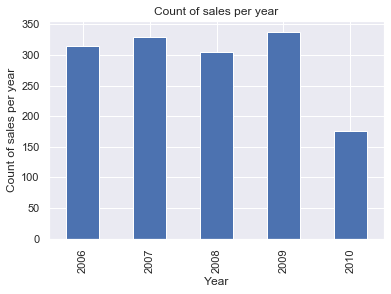

In [19]:
# Look at count of sales by year
_ = count_by_year.plot.bar(legend=False)
_ = plt.xlabel('Year')
_ = plt.ylabel('Count of sales per year')
_ = plt.title('Count of sales per year')

In [20]:
# Look at count of sales by month for 2010
df_2010_by_mo = df[df.YrSold == 2010]
pd.DataFrame(df_2010_by_mo.MoSold.value_counts().sort_index())

,MoSold
1,10
2,15
3,21
4,39
5,48
6,36
7,6


Takeaways:

* June 2010 looks like a 'full month'
* But July 2010 looks like the cut off.  Aka, not at a clean month end

In [21]:
# Is the count of sales increasing earch year?
mean = count_by_year['sales_count'].median()
count_by_year['pct_of_median_year'] = count_by_year['sales_count'] / mean
count_by_year

,sales_count,pct_of_median_year
2006,314,1.000000
2007,329,1.047771
2008,304,0.968153
2009,338,1.076433
2010,175,0.557325


Takeaway:
    
* We're got data for 5 years:  2006 to 2010
* They look pretty much evenly distributed between the years
* Except for 2010.  This is about 1/2 the sales and covers about 1/2 a year
* No clear trend if number of sales in increasing

## Question 4-a:  What is the count of sales by month?  Looking monthly across entire data set

For example, looking at all at "May" sales, irrespective of year.  Mainly, a look at seasonality.

In [22]:
# Make a table
count_by_month = df['MoSold'].value_counts().sort_index()
count_by_month = pd.DataFrame(count_by_month)
count_by_month.index.set_names = 'month'
count_by_month.columns = ['sales_count']
count_by_month

,sales_count
1,58
2,52
3,106
4,141
5,204
6,253
7,234
8,122
9,63
10,89


In [23]:
# Look at summary stats
count_by_month.describe()

,sales_count
count,12.000000
mean,121.666667
std,71.623172
min,52.000000
25%,62.000000
50%,97.500000
75%,156.750000
max,253.000000


In [24]:
# Montly count as percent of monthly median?
mean = count_by_month['sales_count'].median()
count_by_month['pct_of_median_year'] = count_by_month['sales_count'] / mean
count_by_month

,sales_count,pct_of_median_year
1,58,0.594872
2,52,0.533333
3,106,1.087179
4,141,1.446154
5,204,2.092308
6,253,2.594872
7,234,2.400000
8,122,1.251282
9,63,0.646154
10,89,0.912821


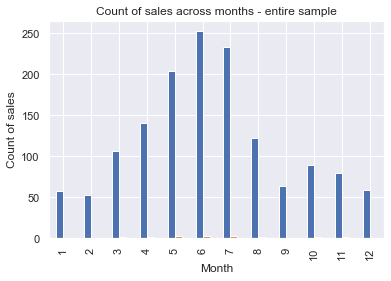

In [25]:
 # Look at graph
_ = count_by_month.plot.bar(legend=False)
_ = plt.xlabel('Month')
_ = plt.ylabel('Count of sales')
_ = plt.title('Count of sales across months - entire sample')

Takeways:
    
* About 120 a month, mean
* About 100 a month, median
* But big variation by month--a standard deviation of 75 a month
* Some of biggest months (May, June, July) are 4x to 5x the size of smallest months months (Dec and Jan)
* Likely, seasonality:  You sell homes in the summer

## Question 4-b:  What is the count of sales by month?  Looking monthly only a 'full years'


Let's drop the "partial" year (2010) to get a better feel for seasonality.

In [26]:
# Make a table
count_by_month_full_yrs = df[df['YrSold'] != 2010]
count_by_month_full_yrs = count_by_month_full_yrs['MoSold'].value_counts().sort_index()
count_by_month_full_yrs = pd.DataFrame(count_by_month_full_yrs)
count_by_month_full_yrs.index.set_names = 'month'
count_by_month_full_yrs.columns = ['sales_count']
count_by_month_full_yrs

,sales_count
1,48
2,37
3,85
4,102
5,156
6,217
7,228
8,122
9,63
10,89


In [27]:
# Get basic stats
count_by_month_full_yrs.describe()

,sales_count
count,12.000000
mean,107.083333
std,62.960967
min,37.000000
25%,62.000000
50%,87.000000
75%,130.500000
max,228.000000


In [28]:
# Montly count as percent of monthly median?
mean = count_by_month_full_yrs['sales_count'].median()
count_by_month_full_yrs['pct_of_median_year'] = count_by_month_full_yrs['sales_count'] / mean
count_by_month_full_yrs

,sales_count,pct_of_median_year
1,48,0.551724
2,37,0.425287
3,85,0.977011
4,102,1.172414
5,156,1.793103
6,217,2.494253
7,228,2.620690
8,122,1.402299
9,63,0.724138
10,89,1.022989


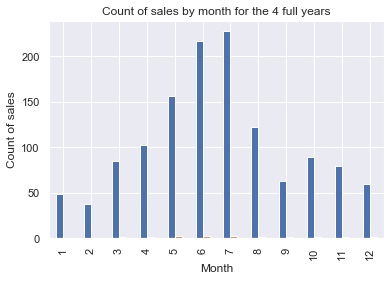

In [29]:
 # Look at graph
_ = count_by_month_full_yrs.plot.bar(legend=False)
_ = plt.xlabel('Month')
_ = plt.ylabel('Count of sales')
_ = plt.title('Count of sales by month for the 4 full years')

## Question 4-c:  What's the count by season?

Aka, spring, summer, winter or fall.

In [30]:
# Turn momths into seasons

# Add seasons to my table
seasons = {1:'Winter', 
           2:'Winter',
           3:'Spring',
           4:'Spring', 
           5:'Spring', 
           6:'Summer', 
           7:'Summer', 
           8:'Summer', 
           9:'Fall', 
           10:'Fall', 
           11:'Fall', 
           12:'Winter'
          }
count_by_month_full_yrs['season'] = pd.Series(seasons)

## Drop percent of year
count_by_month_full_yrs.drop('pct_of_median_year', axis=1, inplace=True)
count_by_month_full_yrs

# Sum by seasons
count_by_month_full_yrs_by_season = count_by_month_full_yrs.groupby(['season']).sum()
count_by_month_full_yrs_by_season

,sales_count
season,
Fall,231
Spring,343
Summer,567
Winter,144


In [31]:
count_by_month_full_yrs_by_season.describe()

,sales_count
count,4.000000
mean,321.250000
std,182.965161
min,144.000000
25%,209.250000
50%,287.000000
75%,399.000000
max,567.000000


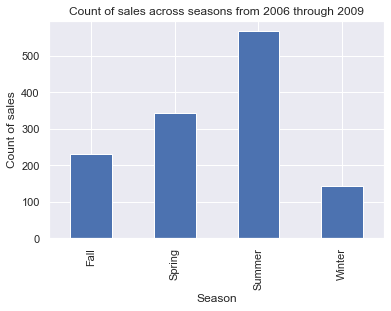

In [32]:
# Look at graph
_ = count_by_month_full_yrs_by_season.plot.bar(legend=False)
_ = plt.xlabel('Season')
_ = plt.ylabel('Count of sales')
_ = plt.title('Count of sales across seasons from 2006 through 2009')

Takeaways:
    
* When looking at full years only (aka, dropping the partial year 2010)
* The summer months are much higher
* Summer is larger
* Winter is smaller

## Quesiton 5:  What is the count of sales by calendar month?

Looking at sales in May 2007, for example.

In [33]:
## Make a table 
count_by_yr_mo = df['YrMoSold'].value_counts().sort_index()
count_by_yr_mo = pd.DataFrame(count_by_yr_mo)
count_by_yr_mo.index.set_names = 'month'
count_by_yr_mo.columns = ['sales_count']

In [34]:
# Look at summary stats
count_by_yr_mo.describe()

,sales_count
count,55.000000
mean,26.545455
std,15.617913
min,6.000000
25%,15.000000
50%,23.000000
75%,37.500000
max,67.000000


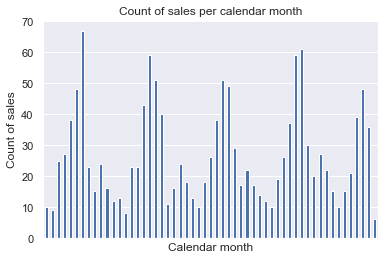

In [35]:
 # Look at graph
_ = count_by_yr_mo.plot(kind='bar', legend=False)
_ = plt.xticks([]) # Got rid of xticks as clutter
_ = plt.xlabel('Calendar month')
_ = plt.ylabel('Count of sales')
_ = plt.title('Count of sales per calendar month')

Takeaways:
    
* Typical month is about 25 sales (mean)
* Strong variation by month--standard deviation of about 16
* Clearly see the seasonality
* Can't really see if count of sales is going up month over month

## Question 6:  How are prices changing year over year?

For example, prices in 2006 compared to those in 2008

In [36]:
# Group by year
df_by_yr = df.groupby('YrSold')

In [37]:
# Get basic stats on SalePrice by year
df_by_year_sum = pd.DataFrame(df_by_yr.SalePrice.describe())
df_by_year_sum

,count,mean,std,min,25%,50%,75%,max
YrSold,,,,,,,,
2006,314.0,182549.458599,79426.838855,35311.0,131375.0,163995.0,218782.5,625000.0
2007,329.0,186063.151976,85768.171410,39300.0,129900.0,167000.0,219500.0,755000.0
2008,304.0,177360.838816,69735.610685,40000.0,131250.0,164000.0,207000.0,446261.0
2009,338.0,179432.103550,80879.237311,34900.0,125250.0,162000.0,212750.0,582933.0
2010,175.0,177393.674286,80451.280085,55000.0,128100.0,155000.0,213250.0,611657.0


[Text(0, 0.5, 'SalePrice')]

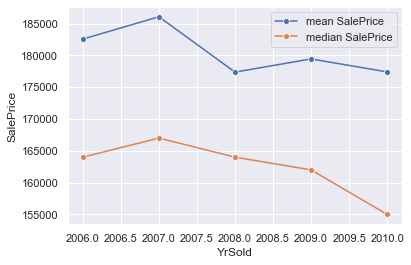

In [38]:
# Graph mean and median SalePrice by year

# Add year as column, not just as index (seems to be how seborn wants the data)
temp = df_by_year_sum
temp['YrSold'] = temp.index.astype('str').astype('int')

# sns.lineplot(x="Datum", y="Menge", data=df)
ax = sns.lineplot(x='YrSold', y='mean', data=temp, label='mean SalePrice', marker='o')
ax = sns.lineplot(x='YrSold', y='50%', data=temp, label='median SalePrice', marker='o')
ax.set(ylabel='SalePrice')

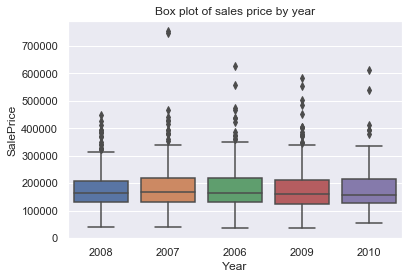

In [39]:
# Look at boxplots by year
g = sns.boxplot(x=df['YrSold'], y=df['SalePrice'], data=df)
g = plt.xlabel('Year')
g = plt.ylabel('SalePrice')
g = plt.title('Box plot of sales price by year')
# NOTE:  Seems easier in Seaborn

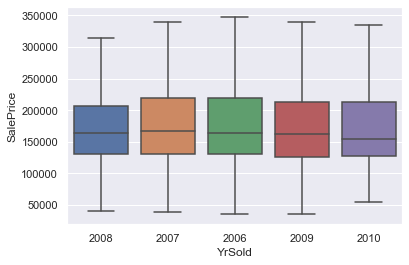

In [40]:
# Look at boxplots by year - without outliers
ax = sns.boxplot(x=df['YrSold'], y=df['SalePrice'], data=df, showfliers=False)

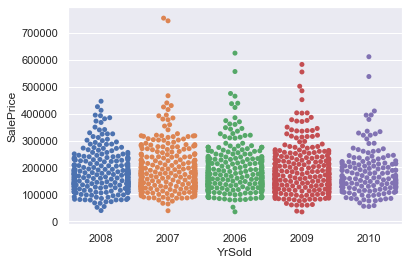

In [41]:
# Look at swarm plots by year
ax = sns.swarmplot(x=df['YrSold'], y=df['SalePrice'], data=df)

In [42]:
# Another try
# ax = sns.barplot(x='YrSold', y='mean', data=temp)
# ax = sns.barplot(x='YrSold', y='50%', data=temp)

Takeaways:
    
* Don't see a big trend in prices year over year from swarm or boxplots
* Maybe prices dropping - from mean and median graph
* Maybe an increase in variability in later years
* Wasn't this the time of the 'Great Recession'--end of housing bubble, bank troubles, etc.

## Summary

My dependent variable is SalePrice, the sales price of residential homes.

* The mean sales price is about \\$180k.  The media is about \\$160k.  
* The min price is \\$35k and the max is a about \\$750
* The distribution of Sales Price isn't normal  Rather, it's positively skewed.  With two peaks at human-readable levels of \\$150k and \\$200K

There are outliers in Sales Price

* All are on the 'upper' side of prices--aka, more expensive homes.
* There are 22 outliers that are beyond three times the standard deviations
* There are 8 outliers that are more than 1.5 IRQ above the 75th percentile.

The data set covers 5 years, from 2006 to 2010.

* There are about 300 sales a year
* 2010 is a partial year
* The typical month is about 25 sales (mean)
* But there's strong variation by months

Sales are highly seasonal

* Some of biggest months (May, June, July) are 4x to 5x the size of smallest months months (Dec and Jan)
* Summer has about 4x the sales of Winter.
* Bottom line, more folks buy and sell homes in summer

Sales prices are not increasing year over year

* For this period, there isn't a trend in year over year prices.
* In fact, prices might be dropping and price variability might be increasing.
* It's worth noting that these prices coincide with the 'Great Recession' in the US (aka, the end of housing bubble, bank troubles caused by real estate derivatives, etc.)